In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

DATA_RAW_PATH = os.path.abspath(os.path.join(
    os.getcwd(), "../data/raw"))
DATA_OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), "../data/output"))

# To get the example images that below worked on please first run the download_assets.py file

#### What is Object Tracking?

**Link**: https://www.geeksforgeeks.org/computer-vision/getting-started-with-object-tracking-using-opencv/

**Object tracking** in **computer vision** is following and keeping a record of the position of any object upon its **change in movement in the video**. Multiple objects can also be tracked simultaneously. The main goal of object tracking is to **maintain the identity** and **positioning of the object** as it moves through the video, despite variations in **appearance**, **size**, **orientation**, and **lighting**, and **releasing the object tracking once the object goes out of the video frame.**

#### Object Detection vs Object Tracking

**Object detection** and **object tracking** are distinct processes.

- **Object Detection**
Object detection **locates objects within an image**, achieved through **training models on datasets** to **recognize specific objects**. It typically involves **drawing bounding boxes** or **labels around detected objects**. This can be applied to both images and videos.

- **Object Tracking**
Object tracking, however, is more intricate, **involving following a specific object's movement across continuous video frames**. Tracking algorithms maintain the object's identity despite changes in appearance or position. Challenges like **dynamic video conditions** and **obstacles are addressed using mathematical** and **deep learning algorithms** to ensure accuracy and effectivenes

#### Object Tracking Using OpenCV

**Object Tracking** involves **analyzing individual frames of a video**, **comparing them to previous frames** to **detect** and **monitor** objects. Initially, objects are **identified, assigned unique IDs if multiple**, and their trajectories are monitored and updated in subsequent frames. OpenCV offers built-in and external tracker libraries like **GOTURN**, **MIL**, **Nano**, **Vit**, **mean shift**, and **camshift**, each with **varying speed** and **accuracy**.

#### Steps of Object Tracking with OpenCV
Below, are the steps of Object Tracking with OpenCV.

1. Prepare the camera and set up the necessary software.
2. Choose the region of interest (ROI) to track from the camera feed. You can pre-trained object detection models for specific object recognition.
3. Initialize the tracking mechanism.
4. Continuously identify instances of the target object within subsequent frames.
5. Update the object's location in each frame.
6. Provide visual indicators, such as bounding boxes or labels, to confirm successful tracking of the object.

#### Object Tracking

**Link**: https://opencv.org/university/

#### What is tracking?

- Tracking in computer vison.
- Motion model and appearnace model.
- OpenCV API Tracker Class.

#### Two Core Concepts in Object Tracking

1. **Appearance Model**:
   - Defines what the object looks like.
   - Usually stores features from the initial appearance of the object (color, texture, histogram, keypoints).
   - Used to match or verify the object in new frames.

Example: In the CSRT tracker, the tracker uses an appearance model based on Discriminative Correlation Filters.

2. **Motion Model**:
   - Predicts where the object will likely move in the next frame.
   - Based on physics: assumes constant velocity, acceleration, etc.
   - Simple version: Linear motion
   - Complex version: Kalman Filter or Optical Flow

Like guessing where the object will appear next.


#### Types of Object Trackers in OpenCV

- **BOOSTING**: Old AdaBoost-based, not very accurate
- **MIL**: Robust to occlusion, not fast
- **KCF**: Fast, uses correlation filters
- **CSRT**: More accurate than KCF, slower
- **MOSSE**: Very fast, uses grayscale correlation
- **GOTURN**: Deep learning-based, needs offline training
- **MedianFlow**: Works well for linear movements
- **Nano/ViT**: New, deep-learning based trackers (OpenCV contrib)


##### Example of tracking a person in a video:

- Appearance model stores their color histogram or deep features (e.g., shirt color).
- Motion model assumes they keep walking forward, predicting their next location.
- If they disappear for 2 frames behind a tree, the motion model still predicts their next position. When they reappear, the appearance model confirms it’s the same person.


#### Goal

 Given the initial location of an object, track location in subsequent frames

![Object Tracking](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_NB11_race_car_tracking.png)

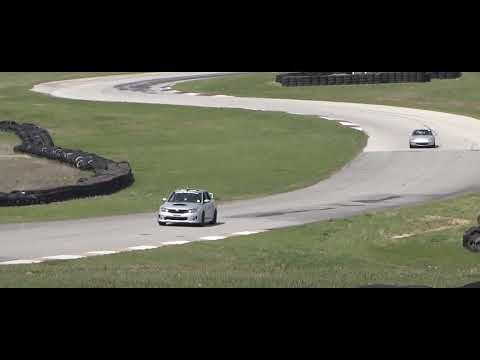

In [2]:
video = YouTubeVideo("XkJCvtCRdVM", width=1024, height=640)
display(video)

#### GOTURN Tracker

![](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_NB11_goturn.jpg)

#### Look to the tracker.py file for the project implementaion